# Проект: Сравнение тарифных планов Мегалайн

# Цели и задачи проекта

## Цель проекта:

Продуктовый маркетинг предлагает вывести на рынок b2c два тарифных плана: «Смарт» и «Ультра». 

Коммерческий департамент запрашивает Отдел аналитики исследовать зарание вопрос, какой тариф приносит больше денег.

Ответ Отдела аналитики послужит основанием для решения Коммерческого департамента по целевому выделению бюджета на маркетинг новых тарифных планов.

## Задачи проекта:

1. Получив годовую статистику пользования услугами Мегалайн по выборке 500 абонентов b2c, в предположении репрезентативности полученной выборки относительно целевого сегмента рынка, исследовать и обосновать вывод в пользу одного из тарифных планов.

2. В случае обнаруженной сегментации рынка Москва-регионы отдельно проверить для сегментов

# Окружение выполнения проекта

## Исследуемые тарифные планы и основные правила тарификации:

| Услуга пакета \ Тариф   | | "СМАРТ" | | "УЛЬТРА" | | Особенности расчета услуги пакета                                      |
| :---------------------- |-| ------: |-| -------: |-| :--------------------------------------------------------------------- |
| **абонплата** в месяц   | | 550 руб | | 1950 руб | |                                                                        |
| *КВОТА ТАРИФА:*         | |         | |          | | неиспользованные квоты сгорают в конце месяца                          |
| **голос** квота в месяц | | 500 мин | | 3000 мин | | тарифицируется с округлением каждого вызова до минут в большую сторону |
| **SMS** квота в месяц   | | 50 sms  | | 1000 sms | |                                                                        |
| **интернет** квота в мес| | 15 GB   | | 30 GB    | | тарифицируется с округлением месячного трафика до GB в большую сторону |
| *СВЕРХ КВОТЫ:*          | |         | |          | | неиспользованные квоты сгорают в конце месяца                          |
| **голос** 1 минута      | | 3 руб   | | 1 руб    | | тарифицируется с округлением каждого вызова до минут в большую сторону |
| **SMS** 1 штука         | | 3 руб   | | 1 руб    | |                                                                        |
| **интернет** 1 GB       | | 200 руб | | 150 руб  | | тарифицируется с округлением месячного трафика до GB в большую сторону |

**ВНИМАНИЕ:** голосовые звонки с нулевой продолжительностью не тарифицируются - это исходящие вызовы, не завершившиеся соединением

**Замечание:** тарифные планы сильно упрощены - отсутствует роуминг, звонки за границу и в сети других операторов, отсутствует деление на исходящие и входящие (вызовы и смс).  Кроме того, расчетный период точно совпадает с календарным месяцем - тогда как у российских операторов он 30 дней (в результато раз в 3-5 лет можно дважды заплатить абонентскую плату в один календарный месяц.

## Статистические данные для исследования:

Имеется 5 файлов формата csv, в каждом находится одноименная таблица:

### Таблица users (информация о пользователях):
* `user_id      —` уникальный идентификатор пользователя
* `first_name   —` имя пользователя
* `last_name    —` фамилия пользователя
* `age          —` возраст пользователя (годы)
* `reg_date     —` дата подключения тарифа (день, месяц, год)
* `churn_date   —` дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* `city         —` город проживания пользователя
* `tariff       —` название тарифного плана

### Таблица calls (информация о звонках):
* `id           —` уникальный номер звонка
* `call_date    —` дата звонка
* `duration     —` длительность звонка в минутах
* `user_id      —` идентификатор пользователя, сделавшего звонок

### Таблица messages (информация о сообщениях):
* `id           —` уникальный номер сообщения
* `message_date —` дата сообщения
* `user_id      —` идентификатор пользователя, отправившего сообщение

### Таблица internet (информация об интернет-сессиях):
* `id           —` уникальный номер сессии
* `mb_used      —` объём потраченного за сессию интернет-трафика (в мегабайтах)
* `session_date —` дата интернет-сессии
* `user_id      —` идентификатор пользователя

### Таблица tariffs (информация о тарифах):
* `tariff_name           —` название тарифа
* `rub_monthly_fee       —` ежемесячная абонентская плата в рублях
* `minutes_included      —` количество минут разговора в месяц, включённых в абонентскую плату
* `messages_included     —` количество сообщений в месяц, включённых в абонентскую плату
* `mb_per_month_included —` объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* `rub_per_minute        —` стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* `rub_per_message       —` стоимость отправки сообщения сверх тарифного пакета
* `rub_per_gb            —` стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## Предварительные соображения о тарификации

В общем случае процесс тарификации тарифицируемых событий происходит пособытийно в строго временном порядке при актуализации контекста тарификации (текущих значений квот, несгораемых остатков, условных скидок, локаций абонента, активированных допопций и других мгновенных значений параметров тарификации).  При таком подходе нам пришлось бы реализовать челночный объект тарификатора, который обрабатывал бы тарифицируемые события в строго временном порядке.  Однако существует упрощенный/вырожденный случай, который позволяет использовать "потенциальность" тарификации - потенциальность означает, что месячная сумма к оплате не зависит от порядка тарифицируемых событий. Самый простой случай, если тарифицируемое собитие имеет аддитивный параметр измерающий количественно услугу, который можно сложить за месяц, вычесть квоту и тарифицировать остаток целиком.

Существенным преимуществом потенциальной тарификации является то, что порядок тарификации событий становится неважным (иначе пришлось бы упорядочивать все события по их временным меткам).

У нас тарифицируются услуги:
1. для SMS потенциальность тарификации очевидна и не требует дополнительной подготовки данных,
2. для интернета ситуация чуть сложнее, но тоже очевидно, что можно сложить весь трафик за месяц, округлить до ГБ, вычесть квоту и добавить стоимость ГБ сверх квоты
3. для голоса нельзя просто сложить продолжительности всех вызовов и вычесть квоту, но при детальном рассмотрении правил тарификации голоса становится понятно, что если округлить продолжительность всех вызовов до минут в большую сторону, то получится искомый аддитивный параметр потенциальной тарификации 

# Предобработка данных

Прежде чем делать традиционную предобработку датасетов, проверим наше понимание инфомодели объектов тарификации:
* Пользователь
* Тариф
* Тарифицируемое событие:
 * Голос
 * SMS
 * Интернет

Первое, что вызывает вопросы - наличие в таблице пользователей параметров жизненного цикла подписки на тариф.  Например, если пользователь меняет тариф, как это отражается в таблице пользователей - появляется ли новая запись, остается ли прежним при этом `user_id`?

## Предварительный анализ данных

In [1]:
import pandas as pd # дальнейший импорт библиотек также перенесен сюда - по мере возникновения необходимости в них
import matplotlib.pyplot as plt
import numpy as np
import math
from datetime import datetime
from scipy import stats as st


In [2]:
try: # проект готовим локально, а проверка будет в репозитории тренажера - разницу в путях к датасетам адресуем try-except
    users_df = pd.read_csv('/datasets/users.csv')
    tariffs_df = pd.read_csv('/datasets/tariffs.csv')
    calls_df = pd.read_csv('/datasets/calls.csv')
    messages_df = pd.read_csv('/datasets/messages.csv')
    internet_df = pd.read_csv('/datasets/internet.csv')

except: # это читинг, но мы отлавливаем известную заранее разницу чтения файлов на локальном ПК и в репозитории тренажера 
    users_df = pd.read_csv('datasets/users.csv')
    tariffs_df = pd.read_csv('datasets/tariffs.csv')
    calls_df = pd.read_csv('datasets/calls.csv')
    messages_df = pd.read_csv('datasets/messages.csv')
    internet_df = pd.read_csv('datasets/internet.csv')

Начнем знакомство с датасетами с тарифов

### Таблица tariffs_df:


In [3]:
display(tariffs_df)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


все совпадает с текстовым описанием тарифов - квота на интернет дана в МБ с корректным переводом 1 ГБ = 1024 (2\*\*10) МБ.  В заключение посмотрим типы данных:

In [4]:
tariffs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Все безукоризненно!  Идем по другим таблицам данных.

### Таблица users_df:

In [5]:
users_df.info() # посмотрим на кол-ва данных, их типы и полноту

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
# приводим даты к формату datetime, для которого определены методы работы со временем
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'], format='%Y-%m-%d')
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'], format='%Y-%m-%d')

churn_df = users_df[ ~users_df['churn_date'].isna() ] # на записях с закрытой подпиской (выше видим, что их 38)
# посмотрим есть ли читеры - те, кто выбирает только льготные условия первого месяца, а потом бросает:
churn_df = churn_df.reset_index(drop=True) # чтобы корректно работала следующая команда перенумеровываем индексы

churn_df['is_cheater'] = (
    churn_df['churn_date'].dt.month == (churn_df['reg_date'] + pd.Series([pd.DateOffset(months=1) for i in range(38)])).dt.month
) | (
churn_df['churn_date'].dt.month == churn_df['reg_date'].dt.month
)


display(churn_df[churn_df['is_cheater']])
print('_______________________________________________________________________________\n')
print(f'ВНИМАНИЕ: {churn_df["is_cheater"].sum()} абонентов из {churn_df["is_cheater"].count()} чернеров являются читерами:')

C:\Users\aseva\.conda\envs\da_practicum_env\lib\site-packages\pandas\core\arrays\datetimelike.py:1108: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  warnings.warn(


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,is_cheater
6,1062,24,2018-12-09,Москва,Александр,Коршунов,2018-11-16,smart,True
12,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,True
14,1163,21,2018-12-16,Москва,Лев,Вишневский,2018-11-03,smart,True
17,1206,35,2018-12-20,Москва,Елена,Шарапова,2018-11-03,smart,True
18,1232,60,2018-11-30,Томск,Виктория,Ларина,2018-10-07,smart,True
19,1242,39,2018-12-21,Хабаровск,Радим,Федосеев,2018-11-18,smart,True
30,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,True
32,1399,31,2018-12-25,Уфа,Алиса,Абрашина,2018-11-06,ultra,True


_______________________________________________________________________________

ВНИМАНИЕ: 8 абонентов из 38 чернеров являются читерами:


In [7]:
users_df['user_id'].value_counts().head()  # проверим, есль ли записи с одинаковым user_id?

1024    1
1353    1
1366    1
1365    1
1364    1
Name: user_id, dtype: int64

In [8]:
users_df[['last_name','first_name']].value_counts().head() # проверим, есть ли пользователи с одинаковым ФИО

last_name  first_name
Ёлчина     Валерия       1
Лобанова   Эльвира       1
Мальцев    Степан        1
Малышев    Авксентий     1
Малинина   Юлия          1
dtype: int64

**Вывод:** в данных нет абонентов сменивших тариф - весь churn был реальным оттоком абонентов к другим операторам!  То есть инфомодель также упрощенная: один абонент - один тариф.

In [9]:
users_df[['reg_date', 'churn_date']].describe(datetime_is_numeric=True) # посмотрим диапазоны дат

,reg_date,churn_date
count,500,38
mean,2018-06-30 18:57:35.999999744,2018-11-13 00:37:53.684210432
min,2018-01-01 00:00:00,2018-08-17 00:00:00
25%,2018-04-07 12:00:00,2018-10-14 00:00:00
50%,2018-07-02 12:00:00,2018-11-24 00:00:00
75%,2018-09-29 00:00:00,2018-12-15 12:00:00
max,2018-12-31 00:00:00,2018-12-30 00:00:00


часть параметров характеристик показывают 12 часов дня - это эффект определения медианных значений, когда они берутся посередине между значениями в выборке при четном числе последних

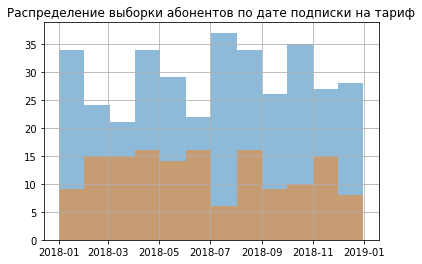

In [10]:
# посмотрим распределение выборки по периоду подписки (1 bin = 1 месяц)
common_ax = users_df.query('tariff == "smart"')['reg_date'].hist(bins=12, alpha=0.5) 
users_df.query('tariff == "ultra"')['reg_date'].hist(ax=common_ax, bins=12, alpha=0.5)

plt.title('Распределение выборки абонентов по дате подписки на тариф')
plt.show()

Голубым отрисованы абоненты более дешевого тарифа "Смарт", а коричневым - абоненты "Ультра". Мы видим, что в выборке находятся абоненты, подписавшиеся на два тарифных плана в 2018 году, причем они брались случайно весь год - а не в начале года.  Предполагается, что их кол-ва стратифицированы репрезентативно статистике b2c рынка - во всяком случае, мы видим, что пользователей более дешевого тарифа примерно в 3 раза больше.

Цифры оттока, к сожалению, малы, чтобы судить по его скорости о сравнительной привлекательности тарифов - после стратификации получим менее 30 значений в выборке на один тариф.  Но видно, что отток растет со временем: первая четверть чернеров уходит за 2 месяца, вторая - за 4/3 месяца, третья - за 3/4 месяца и последняя - всего за полмесяца.  Можно рекомендовать предоставить большую выборку для сравнения тарифных планов по оттоку их абонентов.

Замечание по поводу возраста - так как в выборке только один год, то нет смысла приводить возраст к дате подписки - менее чем за год возрастные преференции не меняются.  Посмотрим распределение по возрасту:

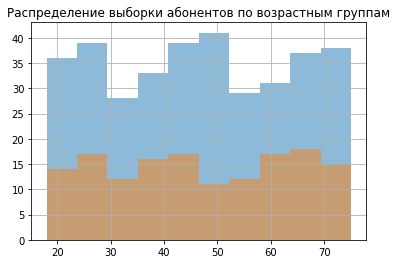

In [11]:
common_ax = users_df.query('tariff == "smart"')['age'].hist(bins=10, alpha=0.5) # 1 bin = 5 лет возраста
users_df.query('tariff == "ultra"')['age'].hist(ax=common_ax, bins=10, alpha=0.5)

plt.title('Распределение выборки абонентов по возрастным группам')
plt.show()

очень странно, что нет возрастных преференций между дешевым и дорогим тарифами - логично было бы ожидать, что пенсионеры и студенты предпочтут более дешевый тариф.  Также странно, что в разных возрастных группах в выборке примерно одинаковое кол-во абонентов - а как же проблема старения общества?

**Вывод:** анализ возрастных трендов проводить не будем

### Таблица calls_df:

In [12]:
calls_df.info() # смотрим типы и полноту данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [13]:
calls_df.head() # смотрим вид значений

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [14]:
calls_df['id'].value_counts().head() # проверим уникальность записей (в сырых CDR с сети дупликаты - частая вещь)

1340_565    1
1179_102    1
1477_564    1
1322_178    1
1101_302    1
Name: id, dtype: int64

In [15]:
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'], format='%Y-%m-%d') # сразу приводим тип для даты звонка

calls_df['call_date'].describe(datetime_is_numeric=True) # проверка на вшивость - нет ли CDR вне 2018 года 

count                           202607
mean     2018-09-02 20:01:37.583992832
min                2018-01-01 00:00:00
25%                2018-07-05 00:00:00
50%                2018-09-17 00:00:00
75%                2018-11-14 00:00:00
max                2018-12-31 00:00:00
Name: call_date, dtype: object

In [16]:
calls_df['duration'].value_counts().head() # сколько же пропущенных вызовов?

0.00    39613
5.50      142
4.49      142
6.15      141
6.38      141
Name: duration, dtype: int64

In [17]:
calls_df['user_id'].value_counts() # попробуем представить себе диапазон активности абонентов

1377    1760
1168    1692
1375    1560
1453    1440
1196    1240
        ... 
1397      33
1442      28
1373      24
1016      20
1257      14
Name: user_id, Length: 492, dtype: int64

Похоже, что id вызова присваивается как user_id + "\_" + порядковый номер вызова.  Проверим, хотя польза этого наблюдения пока не ясна:

In [18]:
calls_df.query('user_id == 1397') # если предположение верно, то должны получить 33 записи с id от 1397_0 до 1397_32

,id,call_date,duration,user_id
162055,1397_0,2018-12-28,0.71,1397
162056,1397_1,2018-12-22,5.40,1397
162057,1397_2,2018-12-23,0.00,1397
162058,1397_3,2018-12-24,11.73,1397
162059,1397_4,2018-12-23,0.00,1397
162060,1397_5,2018-12-23,9.43,1397
162061,1397_6,2018-12-30,0.00,1397
162062,1397_7,2018-12-25,7.48,1397
162063,1397_8,2018-12-26,5.94,1397
162064,1397_9,2018-12-24,0.00,1397


Наблюдение подтвердилось, кроме того, похоже по номерам индексов, что таблица упорядочена по user_id, а потом по id, присвоенному вызову добавлением к user_id порядкового номера вызова.  Но при этом, **нумерация вызовов не монотонна по дате вызова!** Это наводит на мысль, что отсутствие дупликатов может быть фиктивным - просто при занесении в таблицу вызову присваивается уникальный id по простому правилу, но если информация по одному вызову попадет на вход данного процесса, в таблице могут оказаться неявные дупликаты.  К сожалению, отсутствие часов-минут-секунд во времени вызова не позволяет провести анализ на потенциальные дупликаты (по трем столбцам - времени вызова, продолжительности и абоненту).

Заметим также, что по крайней мере 8 абонентов из группы выборки не сделали ни одного голосового вызова за год!  Любители what's-up и других пакетных голосовых приложений!  Гораздо важнее проверить, а все ли абоненты из списка вызовов присутствуют в списке пользователей?  Не зная тарифа, мы не сможем посчитать ревеню от абонента!  Поэтому такие CDR нам не нужны в данном исследовании.

In [19]:
count_users_not_in_list = 0

for i in list(calls_df['user_id'].value_counts().index):
    if int(i) not in list(users_df['user_id']):
        count_users_not_in_list += 1

print(f' количество неизвестных абонентов в таблице вызовов равно {count_users_not_in_list}')

 количество неизвестных абонентов в таблице вызовов равно 0


**Вывод:** таблица вызовов уже отфильтрована по пользователям - для любого вызова в таблице calls_df найдется абонент в таблице users_df.  Строго говоря, надо было бы проверить еще, что дата вызова не выходит за пределы периода [reg_data, churn_data], но это можно будет сделать при тарификации.

### Таблица messages_df:

In [20]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [21]:
messages_df.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [22]:
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'], format='%Y-%m-%d')

In [23]:
count_users_not_in_list = 0

for i in list(messages_df['user_id'].value_counts().index):
    if int(i) not in list(users_df['user_id']):
        count_users_not_in_list += 1

print(f' количество неизвестных абонентов в таблице SMS равно {count_users_not_in_list}')

 количество неизвестных абонентов в таблице SMS равно 0


**Вывод:** как и в случае вызовов, таблица SMS уже отфильтрована по пользователям - для любого SMS в таблице messages_df найдется абонент в таблице users_df. Упорядочивание записей, видимо, проведено аналогично таблице вызовов выше.  Колонка id имеет совпадающие значения с одноименной колонкой таблицы вызовов, поэтому, во избежание путаницы их имена лучше префиксовать соответственно.

### Таблица internet_df:

In [24]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [25]:
internet_df.head() # замечен столбец непонятного назначения - видимо, при выгрузке в файл выгрузили с индексами записей

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [26]:
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'], format='%Y-%m-%d')

In [27]:
count_users_not_in_list = 0

for i in list(internet_df['user_id'].value_counts().index):
    if int(i) not in list(users_df['user_id']):
        count_users_not_in_list += 1

print(f' количество неизвестных абонентов в таблице интернет сессий равно {count_users_not_in_list}')

 количество неизвестных абонентов в таблице интернет сессий равно 0


**Вывод:** как и в случае вызовов, таблица интернет сессий уже отфильтрована по пользователям - для любой сессии в таблице internet_df найдется абонент в таблице users_df. Упорядочивание записей, видимо, проведено аналогично таблице вызовов выше. Колонка id имеет совпадающие значения с одноименной колонкой таблицы вызовов, поэтому, во избежание путаницы их имена лучше префиксовать соответственно.

## Финальная предобработка данных

Завершение предобработки нацелим на максимальную подготовку данных к беспроблемной тарификации:
* удалим из таблиц об использовании услуг события, которые не тарифицируются, либо, которые не относятся к абонентам из выборки 500 пользователей двух тарифов
* добавим столбцы, которые упростят тарификацию (а также обеспечат при необходимости ее потенциальность - см. Предварительные соображения о тарификации выше)

### Финальная предобработка таблицы users_df

устраним NaT в столбце churn_date - заменим на дату 2019-01-01 (она не принадлежит к 2018 годы, как все другие даты, но позволит проводить корректную проверку принадлежности даты тарифицируемых событий к периоду активной подписки абонента на тариф.

In [28]:
users_df['churn_date'] = users_df['churn_date'].fillna(datetime(2019,1,1))

In [29]:
users_df['churn_date'].value_counts().head() # визуальный контроль результатаЖ 500 - 38 (churn) = 462 должно быть за 2019

2019-01-01    462
2018-12-21      2
2018-10-03      2
2018-10-14      2
2018-12-03      2
Name: churn_date, dtype: int64

### Финальная предобработка таблицы calls_df

мы уже проверили, что для всех событий в calls_df есть пользователь в таблице users_id (так что тарификация возможна):

In [30]:
calls_df = calls_df.query('duration > 0.0') # удалим записи с пропущенными вызовами - они не тарифицируются

In [31]:
# добавим даты начала и конца активного тарифа (churn_date уже заполнен для NaT как 2019-01-01)
calls_df = calls_df.merge(users_df[['user_id','tariff','reg_date','churn_date']], on='user_id', how='left')

In [32]:
calls_df.head()

,id,call_date,duration,user_id,tariff,reg_date,churn_date
0,1000_2,2018-06-11,2.85,1000,ultra,2018-05-25,2019-01-01
1,1000_3,2018-09-21,13.80,1000,ultra,2018-05-25,2019-01-01
2,1000_4,2018-12-15,5.18,1000,ultra,2018-05-25,2019-01-01
3,1000_7,2018-08-22,18.31,1000,ultra,2018-05-25,2019-01-01
4,1000_8,2018-09-15,18.44,1000,ultra,2018-05-25,2019-01-01


In [33]:
# проверим, есть ли тарифицируемые события по абонентам вне периода активной подписки на тариф

calls_df['is_active'] = (calls_df['reg_date'] <= calls_df['call_date']) & (calls_df['call_date'] <= calls_df['churn_date'])

print('Количество событий вне периода действия тарифа:', (~calls_df['is_active']).sum())

Количество событий вне периода действия тарифа: 0


**Вывод:** мы проверили, что в таблице calls_df нет вызовов вне периодов подписки на тарифы соответствующего абонента.  Поэтому столбцы reg_date и churn_date, а также is_active не нужны для анализа.  Но при анализе у нас возникла необходимость сохранить информацию, является ли месяц тарифицируемого события первым или последним.  Поэтому удалим их в конце предобработки.

In [34]:
calls_df.head()

,id,call_date,duration,user_id,tariff,reg_date,churn_date,is_active
0,1000_2,2018-06-11,2.85,1000,ultra,2018-05-25,2019-01-01,True
1,1000_3,2018-09-21,13.80,1000,ultra,2018-05-25,2019-01-01,True
2,1000_4,2018-12-15,5.18,1000,ultra,2018-05-25,2019-01-01,True
3,1000_7,2018-08-22,18.31,1000,ultra,2018-05-25,2019-01-01,True
4,1000_8,2018-09-15,18.44,1000,ultra,2018-05-25,2019-01-01,True


In [35]:
# аггрегирование дохода будет по календарным месяцам, поэтому добавим столбец с месяцем:
calls_df['month'] = calls_df['call_date'].dt.month

# для корректности сравнения нам может понадобится исключить неполные месяцы использхования услуг - первый и последний
# поэтому заранее добавим соответствующий столбец с категорией
calls_df['is_complete_month'] = ~ (
    (calls_df['month'] == calls_df['reg_date'].dt.month) | (calls_df['month'] == calls_df['churn_date'].dt.month) 
)

In [36]:
calls_df = calls_df.drop(columns=['reg_date', 'churn_date', 'is_active']) # теперь можем удалить их

In [37]:
# и наконец добавляем столбец с минутами тарификации - используем векторную математику от nympy вместо построчной ф-ции
duration_arr = np.array(calls_df['duration'])
rated_minutes_arr = np.ceil(duration_arr)
calls_df['rated_minutes'] = pd.Series(rated_minutes_arr).astype('int') 

**В итоге таблица calls_df принимает готорый к тарификации вид:**

In [38]:
calls_df = calls_df.rename(columns={'id':'call_id'}) # поскольку одноименный столбец есть в sms и в сессиях интернет 

calls_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162994 entries, 0 to 162993
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   call_id            162994 non-null  object        
 1   call_date          162994 non-null  datetime64[ns]
 2   duration           162994 non-null  float64       
 3   user_id            162994 non-null  int64         
 4   tariff             162994 non-null  object        
 5   month              162994 non-null  int64         
 6   is_complete_month  162994 non-null  bool          
 7   rated_minutes      162994 non-null  int32         
dtypes: bool(1), datetime64[ns](1), float64(1), int32(1), int64(2), object(2)
memory usage: 9.5+ MB


In [39]:
calls_df.head()

,call_id,call_date,duration,user_id,tariff,month,is_complete_month,rated_minutes
0,1000_2,2018-06-11,2.85,1000,ultra,6,True,3
1,1000_3,2018-09-21,13.80,1000,ultra,9,True,14
2,1000_4,2018-12-15,5.18,1000,ultra,12,True,6
3,1000_7,2018-08-22,18.31,1000,ultra,8,True,19
4,1000_8,2018-09-15,18.44,1000,ultra,9,True,19


### Финальная предобработка таблицы messages_id

логика такая,же, как в финальной предобработке таблицы вызовов, только проверку на валидность даты sms активному периоду подписки на тариф уже не будем проверять - судя по результатам проверки по голосовой услуге, здесь лишних тарификационных событий не должно быть тоже.

In [40]:
messages_df = messages_df.merge(users_df[['user_id','tariff','reg_date','churn_date']], on='user_id', how='left')

In [41]:
messages_df['month'] = messages_df['message_date'].dt.month

In [42]:
messages_df['rated_sms'] = pd.Series([1 for i in range(len(messages_df['id']))]).astype('int') 
# вводим для едиообразия суммирования

In [43]:
messages_df['is_complete_month'] = ~ (
    (messages_df['month'] == messages_df['reg_date'].dt.month) | (messages_df['month'] == messages_df['churn_date'].dt.month) 
)

In [44]:
messages_df.head() # вспомним, какие столбцы удалять

,id,message_date,user_id,tariff,reg_date,churn_date,month,rated_sms,is_complete_month
0,1000_0,2018-06-27,1000,ultra,2018-05-25,2019-01-01,6,1,True
1,1000_1,2018-10-08,1000,ultra,2018-05-25,2019-01-01,10,1,True
2,1000_2,2018-08-04,1000,ultra,2018-05-25,2019-01-01,8,1,True
3,1000_3,2018-06-16,1000,ultra,2018-05-25,2019-01-01,6,1,True
4,1000_4,2018-12-05,1000,ultra,2018-05-25,2019-01-01,12,1,True


In [45]:
messages_df = messages_df.drop(columns=['churn_date', 'reg_date'])

messages_df = messages_df.rename(columns={'id':'message_id'})

**В итоге таблица messages_df принимает готорый к тарификации вид:**

In [46]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123036 entries, 0 to 123035
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   message_id         123036 non-null  object        
 1   message_date       123036 non-null  datetime64[ns]
 2   user_id            123036 non-null  int64         
 3   tariff             123036 non-null  object        
 4   month              123036 non-null  int64         
 5   rated_sms          123036 non-null  int32         
 6   is_complete_month  123036 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int32(1), int64(2), object(2)
memory usage: 6.2+ MB


In [47]:
messages_df.head()

,message_id,message_date,user_id,tariff,month,rated_sms,is_complete_month
0,1000_0,2018-06-27,1000,ultra,6,1,True
1,1000_1,2018-10-08,1000,ultra,10,1,True
2,1000_2,2018-08-04,1000,ultra,8,1,True
3,1000_3,2018-06-16,1000,ultra,6,1,True
4,1000_4,2018-12-05,1000,ultra,12,1,True


### Финальная предобработка таблицы internet_id

логика такая,же, как в финальной предобработке таблицы вызовов, только проверку на валидность даты сессии активному периоду подписки на тариф уже не будем проверять - судя по результатам проверки по голосовой услуге, здесь лишних тарификационных событий не должно быть тоже.

In [48]:
internet_df = internet_df.merge(users_df[['user_id','tariff','reg_date','churn_date']], on='user_id', how='left')

In [49]:
internet_df['month'] = internet_df['session_date'].dt.month

In [50]:
internet_df['is_complete_month'] = ~ (
    (internet_df['month'] == internet_df['reg_date'].dt.month) | (internet_df['month'] == internet_df['churn_date'].dt.month) 
)

In [51]:
internet_df.head() # вспомним, какие столбцы удалять

,Unnamed: 0,id,mb_used,session_date,user_id,tariff,reg_date,churn_date,month,is_complete_month
0,0,1000_0,112.95,2018-11-25,1000,ultra,2018-05-25,2019-01-01,11,True
1,1,1000_1,1052.81,2018-09-07,1000,ultra,2018-05-25,2019-01-01,9,True
2,2,1000_2,1197.26,2018-06-25,1000,ultra,2018-05-25,2019-01-01,6,True
3,3,1000_3,550.27,2018-08-22,1000,ultra,2018-05-25,2019-01-01,8,True
4,4,1000_4,302.56,2018-09-24,1000,ultra,2018-05-25,2019-01-01,9,True


In [52]:
internet_df = internet_df.drop(columns=['Unnamed: 0', 'churn_date', 'reg_date'])

internet_df = internet_df.rename(columns={'id':'session_id', 'mb_used':'rated_traffic_mb'})

**В итоге таблица internet_df принимает готорый к тарификации вид:**

In [53]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   session_id         149396 non-null  object        
 1   rated_traffic_mb   149396 non-null  float64       
 2   session_date       149396 non-null  datetime64[ns]
 3   user_id            149396 non-null  int64         
 4   tariff             149396 non-null  object        
 5   month              149396 non-null  int64         
 6   is_complete_month  149396 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 8.1+ MB


In [54]:
internet_df.head()

,session_id,rated_traffic_mb,session_date,user_id,tariff,month,is_complete_month
0,1000_0,112.95,2018-11-25,1000,ultra,11,True
1,1000_1,1052.81,2018-09-07,1000,ultra,9,True
2,1000_2,1197.26,2018-06-25,1000,ultra,6,True
3,1000_3,550.27,2018-08-22,1000,ultra,8,True
4,1000_4,302.56,2018-09-24,1000,ultra,9,True


# Тарификация и подготовка параметров для анализа

## Неполнота статистики по первому и последнему (у чернеров) месяцам

тот факт, что абоненты выборки прибывают и убывают на протяжении всего года, требует дополнительных усилий по горантированию корректности сравнений - например, если абонент пришел или ушел в какой-то месяц, то его потребление услуг в этом месяце не является полным  

In [55]:
calls_df['is_complete_month'].value_counts()

True     147626
False     15368
Name: is_complete_month, dtype: int64

In [56]:
messages_df['is_complete_month'].value_counts()

True     110842
False     12194
Name: is_complete_month, dtype: int64

In [57]:
internet_df['is_complete_month'].value_counts()

True     135119
False     14277
Name: is_complete_month, dtype: int64

Как видим, по всем видам услуг более 10% записей относятся к неполным месяцам, поэтому их надо исключить из сравнения, иначе будет сделан неверный вывод о низком потреблении в эти месяцы.

В целом интересным является вопрос, какое кол-во абонентов из выборки вносит вклад в среднее потребление каждый месяц?  Исключая крайние месяцы подписки, имеем:

In [58]:
active_users_monthly_lst = []

for m in list(range(13))[1:] : # номера месяцев
    active_users_monthly_lst.append(
( (users_df['reg_date'].dt.month<m)&((m<users_df['churn_date'].dt.month)|(users_df['churn_date']==datetime(2019,1,1))) ).sum()
    ) # месяц m идет строго между крайними месяцами. Для тех, кто не стал чернерами, churn_date проставлен как 01.01.2019
    
active_users_monthly_df = pd.DataFrame(
    {
        'month_of_2018': list(range(1,13)),
        'active_subscribers_in_evaluation': active_users_monthly_lst
    }

)

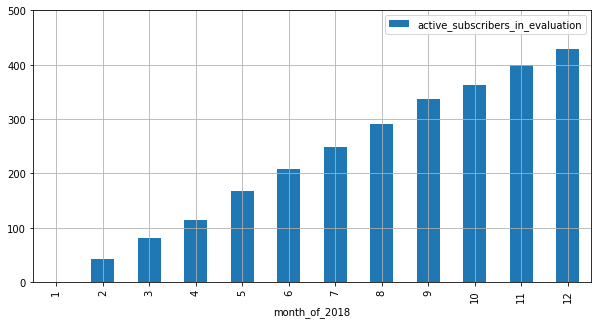

In [59]:
active_users_monthly_df.plot(kind='bar', x='month_of_2018', y='active_subscribers_in_evaluation', ylim=(0,500), figsize=(10,5))

plt.grid()
plt.show()

Наверное, это была не лучшая идея брать в выборку только абонентов, подписавшихся на тариф в 2018.  Отметим это в общих выводах.

## Объемы потребления услуг по абонентам и месяцам

### Голосовые услуги: минуты в месяц и вызовы в месяц

In [60]:
minutes_monthly_per_user_pvt = calls_df.query('is_complete_month').pivot_table(
    index='user_id', columns='month', values='rated_minutes', aggfunc='sum'
)

In [61]:
print('_____________________________________________________________________\n')
print('Таблица количества минут в месяц по абонентам minutes_monthly_per_user_pvt:')
display(minutes_monthly_per_user_pvt)
print('*) неполные месяцы исключены, увы, включая январь')
print('_____________________________________________________________________\n')

_____________________________________________________________________

Таблица количества минут в месяц по абонентам minutes_monthly_per_user_pvt:


month,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,172.0,340.0,408.0,466.0,350.0,338.0,333.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,414.0
1002,NaN,NaN,NaN,NaN,NaN,214.0,289.0,206.0,212.0,243.0,236.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,961.0,855.0,824.0,802.0
1004,NaN,NaN,NaN,NaN,171.0,135.0,137.0,117.0,145.0,117.0,130.0
...,...,...,...,...,...,...,...,...,...,...,...
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,813.0,1030.0,954.0,1031.0
1496,594.0,557.0,521.0,484.0,555.0,582.0,527.0,486.0,450.0,662.0,518.0
1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,371.0,545.0


*) неполные месяцы исключены, увы, включая январь
_____________________________________________________________________



Это уже можно тарифицировать, но в инструкции по выполнению проекта еще зачем-то запрашивается найти кол-ва сделанных вызовов, а не только тарифицируемые минуты.  Это делатся аналогично:

In [62]:
calls_monthly_per_user_pvt = calls_df.query('is_complete_month').pivot_table(
    index='user_id', columns='month', values='rated_minutes', aggfunc='count'
)

print('_____________________________________________________________________\n')
print('Таблица количества вызовов в месяц по абонентам calls_monthly_per_user_pvt:')
display(calls_monthly_per_user_pvt)
print('*) неполные месяцы исключены, увы, включая январь')
print('_____________________________________________________________________\n')

_____________________________________________________________________

Таблица количества вызовов в месяц по абонентам calls_monthly_per_user_pvt:


month,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,28.0,41.0,42.0,46.0,44.0,37.0,38.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0
1002,NaN,NaN,NaN,NaN,NaN,21.0,37.0,25.0,24.0,25.0,27.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.0,97.0,95.0,88.0
1004,NaN,NaN,NaN,NaN,25.0,20.0,18.0,18.0,21.0,15.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.0,126.0,112.0,120.0
1496,65.0,67.0,52.0,50.0,57.0,63.0,62.0,58.0,56.0,66.0,65.0
1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,58.0


*) неполные месяцы исключены, увы, включая январь
_____________________________________________________________________



Впечатляющее кол-во NaN еще раз напоминает о неудачном критерии выборки абонентов - это еще января нет в таблице, так как он неполон у все абонентов выборки!

### Услуги SMS: исходящие в месяц

In [63]:
sms_monthly_per_user_pvt = messages_df.query('is_complete_month').pivot_table(
    index='user_id', columns='month', values='rated_sms', aggfunc='sum'
)

print('_____________________________________________________________________\n')
print('Таблица количества sms в месяц по абонентам sms_monthly_per_user_pvt:')
display(sms_monthly_per_user_pvt)
print('*) неполные месяцы исключены, увы, включая январь')
print('_____________________________________________________________________\n')

_____________________________________________________________________

Таблица количества sms в месяц по абонентам sms_monthly_per_user_pvt:


month,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,60.0,75.0,81.0,57.0,73.0,58.0,70.0
1002,NaN,NaN,NaN,NaN,NaN,11.0,13.0,4.0,10.0,16.0,12.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.0,83.0,94.0,75.0
1004,NaN,NaN,NaN,NaN,134.0,181.0,151.0,146.0,165.0,158.0,162.0
1005,38.0,56.0,41.0,42.0,47.0,56.0,64.0,52.0,44.0,51.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.0,82.0,79.0,84.0
1496,45.0,46.0,49.0,40.0,35.0,42.0,41.0,29.0,35.0,46.0,51.0
1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,17.0


*) неполные месяцы исключены, увы, включая январь
_____________________________________________________________________



### Услуги интернет: трафик в месяц в МБ

In [64]:
mbytes_monthly_per_user_pvt = internet_df.query('is_complete_month').pivot_table(
    index='user_id', columns='month', values='rated_traffic_mb', aggfunc='sum'
)

print('_____________________________________________________________________\n')
print('Таблица объемов интернет трафика в месяц по абонентам mbytes_monthly_per_user_pvt:')
display(mbytes_monthly_per_user_pvt)
print('*) неполные месяцы исключены, увы, включая январь')
print('_____________________________________________________________________\n')

_____________________________________________________________________

Таблица объемов интернет трафика в месяц по абонентам mbytes_monthly_per_user_pvt:


month,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,23233.77,14003.64,14055.93,14568.91,14702.49,14756.47,9817.61
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14036.66
1002,NaN,NaN,NaN,NaN,NaN,17580.10,20319.26,16691.08,13888.25,18587.28,18113.73
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12468.87,14768.14,11356.89,10121.53
1004,NaN,NaN,NaN,NaN,17600.02,22229.58,28584.37,15109.03,18475.44,15616.02,18021.04
...,...,...,...,...,...,...,...,...,...,...,...
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33067.62,29363.00,38939.11,23426.76
1496,28489.67,24959.0,21074.67,23709.75,20134.31,24364.76,23530.03,26934.65,28183.17,25063.40,20736.15
1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14156.08,19918.60


*) неполные месяцы исключены, увы, включая январь
_____________________________________________________________________



**Резюме по рассчетам пользования услугами:**

В таблицах учета пользования услугами выше учтены только полные месяцы подписки - нет использования услуг в месяц оформления подписки, также для 38 чернеров нет услуг в месяц их ухода.  Это объясняет тот факт, что даже по голосу и интернету кол-во записей в пивот-таблицах оказалось существенно меньше 500 - в основном за счет тех, кто подписался на тариф уже в декабре 2018.  Мы уже указывали в этом смысле, что идея брать выборку случайно равномерно распределенной по месяцу подписки была плоха - даже на уровне методологии подхода мы сразу теряем порядка 1/12 от 500 = 41 абонентов в подписке - что ожидаются в среднем к приходу в декабре.  По диаграмме распределения выборки по дате подписки в предоббработке таблицы users_df мы видели, что в декабре 2018 подписалось 28 на тариф Смарт и 8 на тариф Ультра, всего 36.  (Хорошо еще, что отклонение от среднего 41 оказалось в меньшую сторону!) Кроме того, мы помним из предобработки, что 8 абонентов являются читерами, причем 2 из них пришли и ушли в декабре, о 6 - ушли уже в следующем месяце после месяца оформления подписки, поэтому у них нет ни одного полного месяца пользования услугами. В итоге в таблицах использования услуг отсутствует из (500-36-6=) 458 абонентов выборки, с данными годными к анализу хотя бы по одному месяцу в 2018:
* `internet    -` нет данных по (458-457)  1 абоненту (кто-то совсем не пользовался подпиской - видимо проблема маркетинговой раздачи сим-карт)
* `(TDM) calls -` нет данных по (458-452)  6 абонентам (больше чем по интернету, так как часть сим-карт ставится в таблеты или модемы)
* `SMS (GSM)   -` нет данных по (458-392) 66 абонентам (сервис сильно каннибализируется пакетными мессенджерами)

## Тарификация услуг по абонентам и месяцам

нам нужно сперва добавить в к пивот-таблицам объемов услуг информацию о тарифном плане каждого абонента: 

In [65]:
minutes_monthly_per_user_pvt = minutes_monthly_per_user_pvt.merge(users_df[['user_id', 'tariff']], on='user_id', how='left')

sms_monthly_per_user_pvt = sms_monthly_per_user_pvt.merge(users_df[['user_id', 'tariff']], on='user_id', how='left')

mbytes_monthly_per_user_pvt = mbytes_monthly_per_user_pvt.merge(users_df[['user_id', 'tariff']], on='user_id', how='left')

Теперь напишем функции-тарификаторы, принимающие пивот-таблицы объемов услуг

In [66]:
# работать с таблицей тарифов неудобно, имело бы смысл при большом кол-ве тарифов
# для сокращения записи и наглядности определим словари с параметрами тарификации

voice_quota = {'smart': 500, 'ultra':3000} 
sms_quota = {'smart': 50, 'ultra':1000}
traffic_quota = {'smart': 15*1024, 'ultra':30*1024}

subscription_fee = {'smart': 550, 'ultra':1950}

min_rate = {'smart': 3, 'ultra':1}
sms_rate = {'smart': 3, 'ultra':1}
gby_rate = {'smart': 200, 'ultra':150}

In [67]:
def voice_rating_engine(df):
    
    tariff_plan = df['tariff']
    charging_monthly = []
    
    for i in range(2,13):
        if not (df[i]>0.0): charging_monthly.append(0.0)
        elif (df[i]-voice_quota[tariff_plan]) <= 0.0: charging_monthly.append(0.0)
        else: charging_monthly.append( (df[i]-voice_quota[tariff_plan])*min_rate[tariff_plan] )
    
    return charging_monthly

minutes_monthly_per_user_pvt['charging_monthly_feb-dec'] = minutes_monthly_per_user_pvt.apply(voice_rating_engine, axis=1)

In [68]:
def sms_rating_engine(df):
    
    tariff_plan = df['tariff']
    charging_monthly = []
    
    for i in range(2,13):
        if not (df[i]>0.0): charging_monthly.append(0.0)
        elif (df[i]-sms_quota[tariff_plan]) <= 0.0: charging_monthly.append(0.0)
        else: charging_monthly.append( (df[i]-sms_quota[tariff_plan])*sms_rate[tariff_plan] )
    
    return charging_monthly

sms_monthly_per_user_pvt['charging_monthly_feb-dec'] = sms_monthly_per_user_pvt.apply(sms_rating_engine, axis=1)

In [69]:
def traffic_rating_engine(df):
    
    tariff_plan = df['tariff']
    charging_monthly = []
    
    for i in range(2,13):
        if not (df[i]>0.0): charging_monthly.append(0.0)
        elif (df[i]-traffic_quota[tariff_plan]) <= 0.0: charging_monthly.append(0.0)
        else: charging_monthly.append( ( int(df[i]-traffic_quota[tariff_plan]) // 1024 + 1) * gby_rate[tariff_plan] )
    
    return charging_monthly

mbytes_monthly_per_user_pvt['charging_monthly_feb-dec'] = mbytes_monthly_per_user_pvt.apply(traffic_rating_engine, axis=1)

**Тарификация ПОЛНЫХ месяцев подписки завершена для всех абонентов выборки!**

Итак у нас есть для каждого абонента:
* абонентская плата, соответствующая его тарифу
* стоимость потребления услуг голоса, смс и пакетного трафика сверх квоты, определенной его тарифом, рассчитанная по расценкам его тарифа и по заданным правилам тарификации

Данная информация распределена по таблицам, в которых ее было проще рассчитать.  Где ее собирать дальше - зависит от планов проведения дальнейшего анализа.

## Подготовка параметров для анализа

В данном проекте исходные данные не содержат напрямую данные, которые требуются для анализа поставленных задач проекта.  Мы их рассчитываем и формируем под задачи проекта.  Поэтому определимся какие целевые распределения мы собираемся проверять в гипотезах.  В инструкциях по проекту речь идет о средних по абонентам параметрах потребления и оплатах.  Но абоненты сильно отличаются по достоверности данных - как минимум нужно выбросить из рассмотрения 36 подписантов декабря и 6 читеров-чернеров, а также как минимум одного, который вообще не активировал сим-карту.  Но сделаем более общу - добавим в таблицу пользователей еще один столбец с кол-вом полных месяцев на тарифе - данное кол-во будет равно нулю автоматом у всех кандидатов в удаляемые.

In [70]:
def full_months_linefunc(df):
    
    start_month = df['reg_date'].month
    
    if df['churn_date']==datetime(2019,1,1): 
        end_month = 13
    else: end_month = df['churn_date'].month
    
    if start_month == end_month: # это те два читера, которые пришли и ушли в декабре
        return 0
    else: 
        return int(end_month-start_month-1)

users_df['full_months_subs'] = users_df.apply(full_months_linefunc, axis=1)

In [71]:
users_df['full_months_subs'].value_counts() #.sum() - а так проверяем (на вшивость), что в сумме 500

8     52
4     50
1     44
6     43
0     42
2     42
7     41
11    41
3     40
5     40
10    35
9     30
Name: full_months_subs, dtype: int64

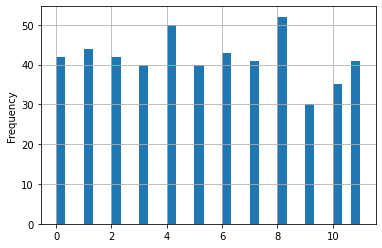

In [72]:
users_df['full_months_subs'].plot(kind='hist', bins=33)

plt.grid()

Мы видим те 42 абонента без полных (календарных) месяцев в подписке - 36 "декабристов" (из них 2 чернера-читера) и еще 6 чернеров читеров, которые пописались не в декабре.  Хотя не в правилах удалять более 5% датасета, но данные абоненты не дают никакой ценной информации для месячной статистики пользования услугами, а держать их в знаменателе всех усреднений - неверно.  Поэтому удаляем их совсем их выборки пользователей (это еще цветочки по сравнению с общими выводами - см. там, что методология выборки лишила нашу статистику 2/3 от месячных данных потребления):  

In [73]:
users_df = users_df.query('full_months_subs > 0')

In [74]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           458 non-null    int64         
 1   age               458 non-null    int64         
 2   churn_date        458 non-null    datetime64[ns]
 3   city              458 non-null    object        
 4   first_name        458 non-null    object        
 5   last_name         458 non-null    object        
 6   reg_date          458 non-null    datetime64[ns]
 7   tariff            458 non-null    object        
 8   full_months_subs  458 non-null    int64         
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 35.8+ KB


но даже для оставшихся 458 абонентов в выборке может оказаться один, который совсем не пользовался симкой (в пивот-таблице месячного потребления интернета только 457 записей) - проверим, не пользовался ли этот олин голосом или смс:

In [75]:
users_white_list = list(mbytes_monthly_per_user_pvt['user_id'])

users_df.query('user_id not in @users_white_list') # найдем этого сачка!

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,full_months_subs
273,1273,46,2019-01-01,Курган,Рэм,Корнилов,2018-05-15,ultra,7


In [76]:
print('В 2018 году Рэм Корнилов из Кургана поговорил по телефону',
      calls_df[calls_df['user_id']==1273]['call_id'].count(), 'раз')

В 2018 году Рэм Корнилов из Кургана поговорил по телефону 248 раз


In [77]:
print('В 2018 году Рэм Корнилов из Кургана отправил',
      messages_df[messages_df['user_id']==1273]['message_id'].count(), 'sms')

В 2018 году Рэм Корнилов из Кургана отправил 272 sms


In [78]:
print('В 2018 году Рэм Корнилов из Кургана воспользовался мобильным интернетом',
      internet_df[internet_df['user_id']==1273]['session_id'].count(), 'раз')

В 2018 году Рэм Корнилов из Кургана воспользовался мобильным интернетом 0 раз


Да, вот такой себе Рэм 46 лет из города Курган, между прочим, с тарифом Ультра - имеет право избегать дурного влияния Интернета, а может у него всегда Wi-Fi подключен!  В любом случае, мы убедились, что все 458 абонентов оставшихся в выборке вносят свой вклад в статистику, и продолжаем их рассматривать.  Хотя не все их них одинаково полезны - возвращаясь к распределению по данным месячной статистики:

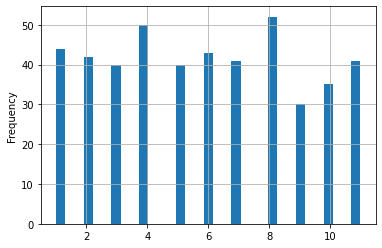

In [79]:
users_df['full_months_subs'].plot(kind='hist', bins=33)

plt.grid()

Примерно 9% абонентов выборки дают среднее потребление только по одному месяцу, еще 9% - только по двум, еще 9% - только по трем, и т.д. - до 11 месяцев.  В инструкции по проекту запрашивается анализ среднего месячного потребления абонентов выборки - не слишком удачная выборка для данной популяции (абоненты), так как теперь мы должны усреднять величины, имеющие разную степень достоверности.  Причем разными будут не только дисперсии, но и рапределения - t-распределение для одной и 10 степеней свободы раз в 10 шире!  Поэтому более привлекательной будет идея смотреть популяцию полных месяцев подписки - хотя случайность выборки  уже не очевидна, но зато дисперсия одинакова!  Выборка вызывает много вопросов, поэтому мои преференции в пользу второго варианта.

**Решение: как компромисс рассмотрим оба варианта и сравним результаты**

### Сведение всех данных для анализа в таблицу users_df

Поскольку самый полный список абонентов выборки у нас в таблице users_df, в нее и будем консолидировать результаты подготовки данных для винального анализа.  Помимо сравнения тарифов у нас запрашивается сравнительный анализ Москва - регионы, поэтому добавим категорию для удобства:

In [80]:
users_df['is_msk'] = users_df['city'] == 'Москва'

In [81]:
users_df = users_df.merge(minutes_monthly_per_user_pvt[['user_id','charging_monthly_feb-dec']], on='user_id', how='left')

users_df = users_df.rename(columns={'charging_monthly_feb-dec':'voice_feb-dec'})

In [82]:
users_df = users_df.merge(sms_monthly_per_user_pvt[['user_id','charging_monthly_feb-dec']], on='user_id', how='left')

users_df = users_df.rename(columns={'charging_monthly_feb-dec':'sms_feb-dec'})

In [83]:
users_df = users_df.merge(mbytes_monthly_per_user_pvt[['user_id','charging_monthly_feb-dec']], on='user_id', how='left')

users_df = users_df.rename(columns={'charging_monthly_feb-dec':'traffic_feb-dec'})

In [84]:
users_df.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,full_months_subs,is_msk,voice_feb-dec,sms_feb-dec,traffic_feb-dec
0,1000,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7,False,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1001,41,2019-01-01,Москва,Иван,Ежов,2018-11-01,smart,1,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,1002,59,2019-01-01,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6,False,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 600, 1000, 400, 0.0,..."
3,1003,23,2019-01-01,Москва,Белла,Белякова,2018-08-17,ultra,4,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,1004,68,2019-01-01,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,7,False,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [85]:
users_df = users_df.fillna(0.0)
users_df.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,full_months_subs,is_msk,voice_feb-dec,sms_feb-dec,traffic_feb-dec
0,1000,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7,False,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1001,41,2019-01-01,Москва,Иван,Ежов,2018-11-01,smart,1,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,1002,59,2019-01-01,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6,False,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 600, 1000, 400, 0.0,..."
3,1003,23,2019-01-01,Москва,Белла,Белякова,2018-08-17,ultra,4,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,1004,68,2019-01-01,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,7,False,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [86]:
# теперь пишем построчную функцию среднего месячного счета за услуги
def avg_bill_linefunc(df):
    tariff_plan = df['tariff']
    voice_over_quota = df['voice_feb-dec']
    sms_over_quota = df['sms_feb-dec']
    internet_over_quota = df['traffic_feb-dec']
    n_o_months = df['full_months_subs']
    
    total = subscription_fee[tariff_plan] # добавляем абонплату по тарифу
    
    if voice_over_quota != 0.0:
        total += sum(voice_over_quota)/n_o_months # добавлаем средний расход сверх квоты за полн.мес

    if sms_over_quota != 0.0:
        total += sum(sms_over_quota)/n_o_months # добавлаем средний расход сверх квоты за полн.мес

    if internet_over_quota != 0.0:
        total += sum(internet_over_quota)/n_o_months # добавлаем средний расход сверх квоты за полн.мес
        
    return total

users_df['avg_monthly_bill'] = users_df.apply(avg_bill_linefunc, axis=1)

### Данные для анализа по выборкам среднемесячных счетов абонентов готовы:

In [87]:
for moscow in (True, False):
    for tariff_plan in ('smart','ultra'):
        print('___________________________________________________________________________\n')
        print(f'_______________________Выборка для {tariff_plan} в Москве={moscow}_____________________')
        print(users_df.query('is_msk == @moscow & tariff == @tariff_plan')['avg_monthly_bill'].describe())
        

___________________________________________________________________________

_______________________Выборка для smart в Москве=True_____________________
count      58.000000
mean     1510.406061
std       861.972107
min       550.000000
25%       961.201705
50%      1272.475000
75%      1962.285714
max      5321.000000
Name: avg_monthly_bill, dtype: float64
___________________________________________________________________________

_______________________Выборка для ultra в Москве=True_____________________
count      32.000000
mean     2070.859375
std       236.283157
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      2137.500000
max      2970.000000
Name: avg_monthly_bill, dtype: float64
___________________________________________________________________________

_______________________Выборка для smart в Москве=False_____________________
count     260.000000
mean     1567.862405
std       899.405595
min       550.000000
25%       964.350000
50%      1354.285714


**Вывод:** все выборки не меньше 30, поэтому могут рассматриваться как репрезентативные.  По всем выборкам есть выбросы превышающие 3 std в хвосте больших значений.  Особенно это бросается в глаза для тарифа Ультра в регионах - там среднее даже оказалось правее 75% значения! Выбросы нужно также отбросить, так как мы анализинуем средние значения, на которые сильно влияют выбросы. 

In [88]:
# будем отбрасывать все, что сверху mean+3*std
# но сперва извлечем выборки в словарь для удобства работы:

subs_sample_dict = {}
for moscow in (True, False):
    for tariff_plan in ('smart','ultra'):
        if moscow: location = 'Moscow'
        else: location = 'Regions'
            
        subs_sample_dict[(tariff_plan, location)] = list( users_df.query(
            'is_msk == @moscow & tariff == @tariff_plan'
        )['avg_monthly_bill'] )

lim_dict = {}
lim_dict[('smart','Moscow')] = 1510.406061 + 3*861.972107
lim_dict[('ultra','Moscow')] = 2070.859375 + 3*236.283157
lim_dict[('smart','Regions')] = 1567.862405 + 3*899.405595
lim_dict[('ultra','Regions')] = 2172.531666 + 3*493.407054

for location in ('Moscow', 'Regions'):
    for tariff_plan in ('smart','ultra'):
        new_bills_list = []
        for bill in subs_sample_dict[(tariff_plan, location)]:
            if bill <= lim_dict[(tariff_plan, location)]: new_bills_list.append(bill)
        subs_sample_dict[(tariff_plan, location)] = new_bills_list

In [89]:
for location in ('Moscow', 'Regions'):
    for tariff_plan in ('smart','ultra'):
        print('___________________________________________________________________________\n')
        print(f'_______________________Выборка для {tariff_plan} в {location}_____________________')
        print(pd.Series(subs_sample_dict[(tariff_plan, location)]).describe())

___________________________________________________________________________

_______________________Выборка для smart в Moscow_____________________
count      57.000000
mean     1443.553536
std       701.724827
min       550.000000
25%       958.875000
50%      1262.750000
75%      1903.142857
max      3691.000000
dtype: float64
___________________________________________________________________________

_______________________Выборка для ultra в Moscow_____________________
count      31.000000
mean     2041.854839
std       172.837941
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      2051.136364
max      2568.750000
dtype: float64
___________________________________________________________________________

_______________________Выборка для smart в Regions_____________________
count     254.000000
mean     1481.666242
std       703.904526
min       550.000000
25%       951.037500
50%      1325.166667
75%      1873.525000
max      3870.000000
dtype: float64
______

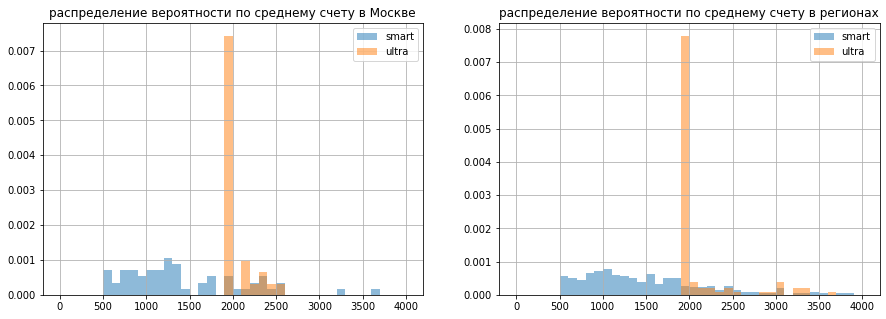

In [90]:
# полюбуемся на графиках:

fig, cax = plt.subplots(1, 2, figsize=(15, 5))

pd.Series(subs_sample_dict[('smart','Moscow')]).hist(ax=cax[0], bins=40, alpha=0.5, label='smart', range=(0,4000), density=True) 
pd.Series(subs_sample_dict[('ultra','Moscow')]).hist(ax=cax[0], bins=40, alpha=0.5, label='ultra', range=(0,4000), density=True)
cax[0].set_title('распределение вероятности по среднему счету в Москве')
cax[0].legend()

pd.Series(subs_sample_dict[('smart','Regions')]).hist(ax=cax[1], bins=40, alpha=0.5, label='smart', range=(0,4000), density=True) 
pd.Series(subs_sample_dict[('ultra','Regions')]).hist(ax=cax[1], bins=40, alpha=0.5, label='ultra', range=(0,4000), density=True)
cax[1].set_title('распределение вероятности по среднему счету в регионах')
cax[1].legend()

plt.show()

гистограммы отвратительные - так как в подходе с усреднением средних счетов по абонентам слишком мало данных и слишком большой разброс.  Но и по ним видно, что большинство (более 93%) абонентов тарифа Смарт потребляют услуги выше квоты, в то время как большинство абонентов тарифа Ультра (75% +/- 2%) остаются на уровне квоты (1 bin соответствует диапазону в 100 руб).

Еще более удивительно, что не видно существенной разницы между Москвой и регионами:
* по тарифу Ультра на квоте сидят 74% москвичей и 77% провинциалов - сказать, что в Москве потребление по Ультра сильнее зашкаливает, чем в регионах, нельзя!
* по тарифу Смарт средние значения в Москве 1444 рубля - в регионах 1482 рубля (даже выше в регионе на 38 рублей = 0.05 std - флуктуация)
* по тарифу Смарт медианные значения в Москве 1263 рубля - в регионах 1325 рублей (даже выше в регионе на 62 рубля = 0.09 std - флуктуация)

Поскольку разницы нет - объединим обратно данные по Москве и регионам.  Так хотя бы увеличим кол-во значений в выборках по тарифам:

In [91]:
for tariff_plan in ('smart', 'ultra'):
    subs_sample_dict[(tariff_plan, 'Russia')] = \
    subs_sample_dict[(tariff_plan, 'Moscow')] + \
    subs_sample_dict[(tariff_plan, 'Regions')]
    

In [92]:
for tariff_plan in ('smart','ultra'):
    print('___________________________________________________________________________\n')
    print(f'_______________________Выборка для {tariff_plan}___________________________________')
    print(pd.Series(subs_sample_dict[(tariff_plan, 'Russia')]).describe())

___________________________________________________________________________

_______________________Выборка для smart___________________________________
count     311.000000
mean     1474.680955
std       702.529658
min       550.000000
25%       951.825000
50%      1309.333333
75%      1875.850000
max      3870.000000
dtype: float64
___________________________________________________________________________

_______________________Выборка для ultra___________________________________
count     135.000000
mean     2094.673481
std       347.775895
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1975.000000
max      3650.000000
dtype: float64


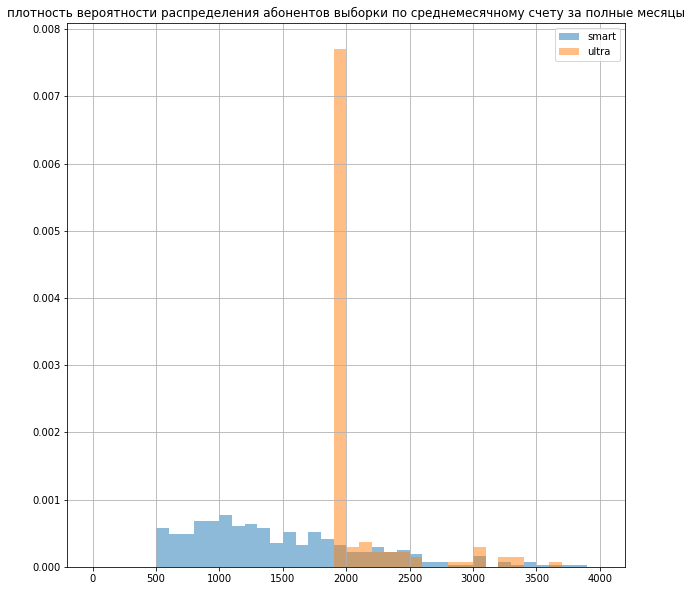

In [93]:
cax = pd.Series(subs_sample_dict[('smart','Russia')]).hist(
    figsize=(10,10), bins=40, alpha=0.5, label='smart', range=(0,4000), density=True) 
pd.Series(subs_sample_dict[('ultra','Russia')]).hist(
    ax=cax, bins=40, alpha=0.5, label='ultra', range=(0,4000), density=True)

plt.title('плотность вероятности распределения абонентов выборки по среднемесячному счету за полные месяцы')
plt.legend()
plt.show()

### Подготовка дополнительных данных для анализа по полным месяцам (без промежуточного усреднения по абонентам)

Это вариант анализа альтернативных статистических воборок.  Причина его проведения заключена в том, что в варианте анализа среднемесячных счетов абонентов разных тарифов у нас в выборке были данные разной степени достоверности, так как, как обсуждалось в предобработке данных, абоненты выборки равномерно случайно распределены по месяцам подписки в 2018.  Помимо того что мы теряем из-за этого больше половины данных за 2018 год, еще одним негативом является то, что у нас в среднем по 9% абонентов выборки дают в анализ данные по точному месячному счету для 1, 2,...11 месяцев.  Так что, у нас в выборке среднемесячных счетов есть 40 средних по одному месяцу, еще 40 - по двум и т.д. до 11 месяцев!  Это все равно, что статистически анализировать данные серии изменений длины, сделанные то пальцами, то линейкой, то штангенциркулем и то микрометром, - творчески замешав их в одну окрошку!

Частично это можно было бы исправить, считая средние в сегментах с весами полных месяцев в подписке, но как корректно при этом посчитать сигмы?

С другой стороны мы предполагаем, что абоненты - суть те же, независимо от даты прихода в тариф, поэтому возникает идея считать средние счета не по абонентам, а по полным месяцам подтебления услуг - при этому влияние разбросов случайных величин для "короткоживущих в  выборке" абонентов будут нивелироваться также, как при усреднении с весами кол-ва полных месяцев, но все элементы выборки будут иметь одинаковую природу дисперсии и сигмы рапределений посчитаются корректно.  Да и выборки будут больше, так что гипотезы сревнения средних могут стать достовернее - в варианте средних по абенентам (см. дальше) одну из гипотез проверить не удалось, именно из-за больших сигм по сравнению с разностью средних.

Самое сложное - вытащить все полные месяца тарификации.  Сделаем отдельный датафрейм со строками - (абонетами, месяцами) и столбцами для анализа и сегментации: точный счет за месяц, тариф, москва/регионы.
Сперва создадим столбцы, потом используем их в конструкторе датафрейма:

In [94]:
users_df = users_df.set_index('user_id') 
# иначе нужно писать построчную функцию - метод df.loc[условие на index, столбец] возвращает Series, а нам нужно значение

In [95]:
col_user_id_lst = []
col_full_month_lst = []
col_tariff_lst = []
col_location_lst = []
col_bill_lst = []

for sub in list(users_df.index):
    for mon_minus_2 in list(range(11)):
        
        if users_df.loc[sub, 'reg_date'].month >= (mon_minus_2 + 2): continue
        
        if users_df.loc[sub, 'churn_date'] != datetime(2019,1,1):
            if users_df.loc[sub, 'churn_date'].month <= (mon_minus_2 + 2): continue
               
        col_user_id_lst.append(sub)
        col_full_month_lst.append(mon_minus_2 + 2)
        col_tariff_lst.append(users_df.loc[sub, 'tariff'])
        col_location_lst.append(users_df.loc[sub, 'is_msk'])
        
        bill = subscription_fee[users_df.loc[sub, 'tariff']]
        
        if users_df.loc[sub, 'voice_feb-dec'] != 0.0:
            bill += users_df.loc[sub, 'voice_feb-dec'][mon_minus_2]
        
        if users_df.loc[sub, 'sms_feb-dec'] != 0.0:
            bill += users_df.loc[sub, 'sms_feb-dec'][mon_minus_2]
            
        if users_df.loc[sub, 'traffic_feb-dec'] != 0.0:
            bill += users_df.loc[sub, 'traffic_feb-dec'][mon_minus_2]
        
        col_bill_lst.append(bill)
                    

In [96]:
monthly_bills_dict = {
    'user_id': col_user_id_lst,
    'month_of_bill': col_full_month_lst,
    'tariff': col_tariff_lst,
    'is_msk': col_location_lst,
    'bill': col_bill_lst,  
}

bills_df = pd.DataFrame(monthly_bills_dict)

bills_df = bills_df.set_index(['user_id','month_of_bill'])

### Данные для анализа по выборкам точных счетов за полные месяцы готовы:

In [97]:
bills_df.info(10) # посмотрим размер выборки

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2680 entries, (1000, 6) to (1499, 12)
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tariff  2680 non-null   object 
 1   is_msk  2680 non-null   bool   
 2   bill    2680 non-null   float64
dtypes: bool(1), float64(1), object(1)
memory usage: 72.6+ KB


In [98]:
bills_df.head(37).tail(20) # поищем и выведем пару типичных абонентов разных тарифов - 1004 и 1005

tariff  is_msk    bill
user_id month_of_bill                       
1003    12             ultra    True  1950.0
1004    6              ultra   False  1950.0
        7              ultra   False  1950.0
        8              ultra   False  1950.0
        9              ultra   False  1950.0
        10             ultra   False  1950.0
        11             ultra   False  1950.0
        12             ultra   False  1950.0
1005    2              smart   False   550.0
        3              smart   False   886.0
        4              smart   False  1186.0
        5              smart   False   835.0
        6              smart   False   886.0
        7              smart   False   775.0
        8              smart   False   949.0
        9              smart   False   556.0
        10             smart   False  1219.0
        11             smart   False   694.0
        12             smart   False   838.0
1006    3              smart   False   950.0

Ну вот, 2680 записей - это существенно лучше для стат-анализа, чем 458! К тому же, у них у всех одинаковая погрешность!

Два типичных абонента разных тарифов:
* 1004, тариф Ультра - пришел в мая 2018, не чернер, ни разу не превысил квоту тарифа (как и у 77% других пользователей Ультра)
* 1005, тариф Смарт - пришел в январе 2018, не чернер, в пределах квоты продержался еще месяц, потом счет за месяц скачет (как и у 93% других пользователей Смарт)

In [99]:
for moscow in (True, False):
    for tariff_plan in ('smart','ultra'):
        print('___________________________________________________________________________\n')
        print(f'_______________________Выборка для {tariff_plan} в Москве={moscow}_____________________')
        print(bills_df.query('is_msk == @moscow & tariff == @tariff_plan')['bill'].describe())
        

___________________________________________________________________________

_______________________Выборка для smart в Москве=True_____________________
count     313.000000
mean     1370.741214
std       764.525205
min       550.000000
25%       750.000000
50%      1174.000000
75%      1750.000000
max      5321.000000
Name: bill, dtype: float64
___________________________________________________________________________

_______________________Выборка для ultra в Москве=True_____________________
count     190.000000
mean     2094.473684
std       376.187343
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4050.000000
Name: bill, dtype: float64
___________________________________________________________________________

_______________________Выборка для smart в Москве=False_____________________
count    1544.000000
mean     1414.963083
std       842.343119
min       550.000000
25%       741.250000
50%      1161.000000
75%      1950.000000
max

Кажется, что сигмы не сильно поменялись по сравнению с вариантом среднемесячных счетов по абонентам, но точность определения среднего увеличилась, так как у нас теперь в 5-6 раз больше элементов выборок, что уменьшает сигму для средних счетов в $\sqrt{5}$ - $\sqrt{6}$ раз! 

К тому же, мы еще не обрезали выбросы за 3 сигма:

In [100]:
# будем отбрасывать все, что сверху mean+3*std
# но сперва извлечем выборки в словарь для удобства работы:

bills_sample_dict = {}
for moscow in (True, False):
    for tariff_plan in ('smart','ultra'):
        if moscow: location = 'Moscow'
        else: location = 'Regions'
            
        bills_sample_dict[(tariff_plan, location)] = list( bills_df.query(
            'is_msk == @moscow & tariff == @tariff_plan'
        )['bill'] )

lim_dict = {}
lim_dict[('smart','Moscow')] = 1370.741214 + 3*764.525205  # 1510.406061 + 3*861.972107 оставлено для сравнения с вариантом 
lim_dict[('ultra','Moscow')] = 2094.473684 + 3*376.187343  # 2070.859375 + 3*236.283157 выборок по среднемесячным счетам аб.
lim_dict[('smart','Regions')] = 1414.963083 + 3*842.343119 # 1567.862405 + 3*899.405595
lim_dict[('ultra','Regions')] = 2091.232227 + 3*415.823947 # 2172.531666 + 3*493.407054

for location in ('Moscow', 'Regions'):
    for tariff_plan in ('smart','ultra'):
        new_bills_list = []
        for bill in bills_sample_dict[(tariff_plan, location)]:
            if bill <= lim_dict[(tariff_plan, location)]: new_bills_list.append(bill)
        bills_sample_dict[(tariff_plan, location)] = new_bills_list

In [101]:
for location in ('Moscow', 'Regions'):
    for tariff_plan in ('smart','ultra'):
        print('___________________________________________________________________________\n')
        print(f'_______________________Выборка для {tariff_plan} в {location}_____________________')
        print(pd.Series(bills_sample_dict[(tariff_plan, location)]).describe())

___________________________________________________________________________

_______________________Выборка для smart в Moscow_____________________
count     311.000000
mean     1349.212219
std       716.349356
min       550.000000
25%       750.000000
50%      1162.000000
75%      1750.000000
max      3375.000000
dtype: float64
___________________________________________________________________________

_______________________Выборка для ultra в Moscow_____________________
count     184.000000
mean     2044.565217
std       253.063905
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      3150.000000
dtype: float64
___________________________________________________________________________

_______________________Выборка для smart в Regions_____________________
count    1526.000000
mean     1375.468545
std       759.916956
min       550.000000
25%       736.000000
50%      1150.000000
75%      1914.250000
max      3915.000000
dtype: float64
______

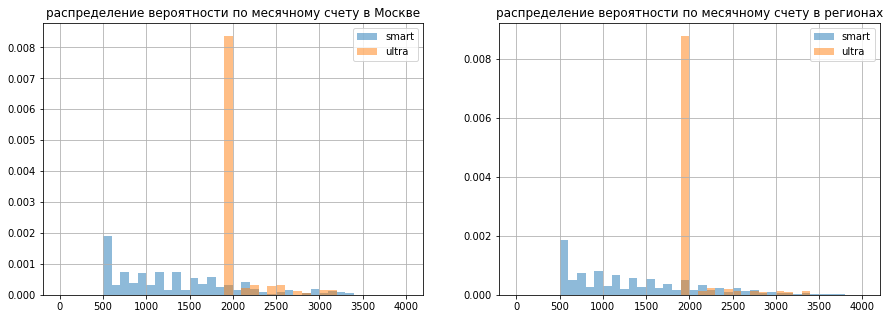

In [102]:
# тоже полюбуемся на графиках:

fig, cax = plt.subplots(1, 2, figsize=(15, 5))

pd.Series(bills_sample_dict[('smart','Moscow')]).hist(ax=cax[0], bins=40, alpha=0.5, label='smart', range=(0,4000), density=True) 
pd.Series(bills_sample_dict[('ultra','Moscow')]).hist(ax=cax[0], bins=40, alpha=0.5, label='ultra', range=(0,4000), density=True)
cax[0].set_title('распределение вероятности по месячному счету в Москве')
cax[0].legend()

pd.Series(bills_sample_dict[('smart','Regions')]).hist(ax=cax[1], bins=40, alpha=0.5, label='smart', range=(0,4000), density=True) 
pd.Series(bills_sample_dict[('ultra','Regions')]).hist(ax=cax[1], bins=40, alpha=0.5, label='ultra', range=(0,4000), density=True)
cax[1].set_title('распределение вероятности по месячному счету в регионах')
cax[1].legend()

plt.show()

Заметим, что в варианте статистики по счетам за месяц мы видим, что еще большая часть оброих распредлелений остается на уровне квоты - это понятно, так как при предварительном усреднении месячного счета для каждого абонента мы теряли тах, кто чать месяцев оставался на квоте - все их счета усреднялись в пользу превышения квоты!

Так же как в первом варианте объединим Москву и регионы:

In [103]:
for tariff_plan in ('smart', 'ultra'):
    bills_sample_dict[(tariff_plan, 'Russia')] = \
    bills_sample_dict[(tariff_plan, 'Moscow')] + \
    bills_sample_dict[(tariff_plan, 'Regions')]
    
for tariff_plan in ('smart','ultra'):
    print('___________________________________________________________________________\n')
    print(f'_______________________Выборка для {tariff_plan}___________________________________')
    print(pd.Series(bills_sample_dict[(tariff_plan, 'Russia')]).describe())

___________________________________________________________________________

_______________________Выборка для smart___________________________________
count    1837.000000
mean     1371.023408
std       752.593230
min       550.000000
25%       739.000000
50%      1150.000000
75%      1864.000000
max      3915.000000
dtype: float64
___________________________________________________________________________

_______________________Выборка для ultra___________________________________
count     796.000000
mean     2034.233668
std       255.799726
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      3300.000000
dtype: float64


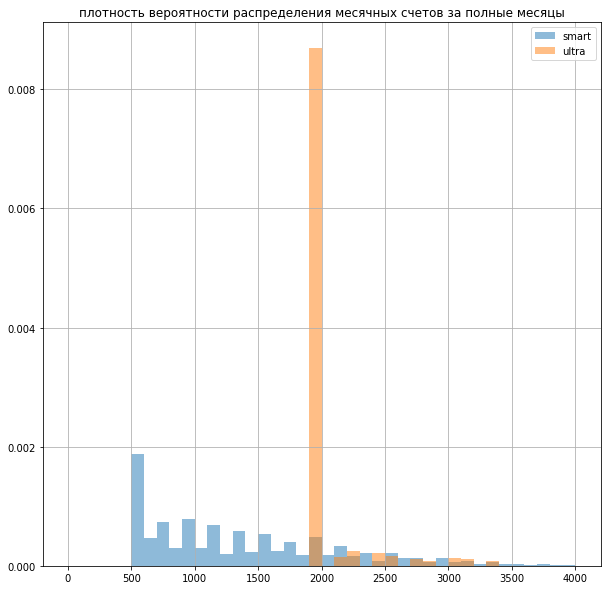

In [104]:
cax = pd.Series(bills_sample_dict[('smart','Russia')]).hist(
    figsize=(10,10), bins=40, alpha=0.5, label='smart', range=(0,4000), density=True) 
pd.Series(bills_sample_dict[('ultra','Russia')]).hist(
    ax=cax, bins=40, alpha=0.5, label='ultra', range=(0,4000), density=True)

plt.title('плотность вероятности распределения месячных счетов за полные месяцы')
plt.legend()
plt.show()

# Проверка гипотез

## средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

* $H_0$ - нулевая гипотеза будет что среднемесячные выручки совпадают,
* $H_1$ - альтернативная гипотеза, что не совпадают соответственно.

Для того, чтобы быть уверенными, что выручки не совпадают, нужно, чтобы p-value хвоста было меньше достаточно малой $\alpha$.  Что взять за разумную величину для альфа.  Так как статистика за год, то разумно потребовать критерия достоверности 95% для того, чтобы ни разу за N лет не оказалось выборки абонентов, что даст обратный результат сравнения: то есть $(1-\alpha)^N = 1 - 5\%$.  Какую характерную величину взять за N?  Возьмем кол-во лет существования мобильной связи, или оператора Мегалайн.  N=30, тогда альфа будет (в линейном приближении по 1/N) примерно 5% / 30 = 0,0017

### проверка на выборках среднемесячных счетов по абонентам (только полные месяца подписки)

Итак у нас есть два распределения для сравнения:
* `subs_sample_dict[('smart','Russia')]` - содержит список 311 значений среднемесячных счетов абонентов тарифа Смарт
* `subs_sample_dict[('ultra','Russia')]` - содержит список 135 значений среднемесячных счетов абонентов тарифа Ультра

In [105]:
alpha = 0.05/30

array1 = np.array( subs_sample_dict[('smart','Russia')] )
array2 = np.array( subs_sample_dict[('ultra','Russia')] )

comparison = st.ttest_ind (array1, array2, equal_var=False) # и дисперсия разная и кол-во значений в выборках => False

print('ИТАК:')
print('Вероятность при повторении выборок абонентов получить такую разницу средних или большую,')
print('в том случае, если бы среднемесячные счета для тарифов Смарт и Ультра совпадали, составляет: ', comparison.pvalue)

ИТАК:
Вероятность при повторении выборок абонентов получить такую разницу средних или большую,
в том случае, если бы среднемесячные счета для тарифов Смарт и Ультра совпадали, составляет:  1.2424755817347488e-30


Наша альфа сравнения в научной нотации равна 1.7e-3, то есть степень достоверности имеет еще 27 десятичных порядков величины.  Что можно увидеть и невооруженным глазом:

In [106]:
smart_mean = 1474.680955
smart_std = 702.529658
std_smart_mean = smart_std/math.sqrt(311) # это разброс среднего значения по таким выборкам абонентов
smart_mean_plus_3std = smart_mean + 3* std_smart_mean  # с одной стороны от этого значения находится 0.0014 вероятности средних

# аналогично для Ультра
ultra_mean = 2094.673481
ultra_std = 347.775895
std_ultra_mean = ultra_std/math.sqrt(135) 
ultra_mean_minus_3std = ultra_mean - 3* std_ultra_mean

print('вероятность, что средний счет Смарт превысит данное значение меньше 0.0014:', smart_mean_plus_3std)
print('вероятность, что средний счет Ультра будет менее данного значения меньше 0.0014:', ultra_mean_minus_3std)

вероятность, что средний счет Смарт превысит данное значение меньше 0.0014: 1594.1913614315006
вероятность, что средний счет Ультра будет менее данного значения меньше 0.0014: 2004.8781310301745


И даже с трехкратной сигмой там еще огромный зазор между счетами - в 410 рублей!  Кстати 3 сигма дают pvalue для нормального распределения средних порядка нашей взятой альфы!

**Вывод:** Среднемесячные счета абонентов тарифов Смарт и Ультра различаются с достоверностью до $10^{27}$ повторения проведенного выборочного замера.  С достоверностью 95% на периоде времени существования Мегалайна тариф Ультра в среднем за год приносит не менее чем на 410 рублей больше ежемесячно, чем тариф Смарт (однако по статистике выборки абонентов он в три раза менее привлекателен!)

### проверка на выборках точных месячных счетов по месяцам (только полные месяца подписки)

Аналогично варианту 1 у нас есть два распределения для сравнения:
* `bills_sample_dict[('smart','Russia')]` - содержит список 1837 (вместо 311 в варианте 1) значений месячных счетов тарифа Смарт
* `bills_sample_dict[('ultra','Russia')]` - содержит список 796 (вместо 135 в варианте 1) значений месячных счетов тарифа Ультра

In [107]:
alpha = 0.05/30

array1 = np.array( bills_sample_dict[('smart','Russia')] )
array2 = np.array( bills_sample_dict[('ultra','Russia')] )

comparison = st.ttest_ind (array1, array2, equal_var=False) # и дисперсия разная и кол-во значений в выборках => False

print('ИТАК:')
print('Вероятность при повторении выборок абонентов получить такую разницу средних или большую,')
print('в том случае, если бы среднемесячные счета для тарифов Смарт и Ультра совпадали, составляет: ', comparison.pvalue)

ИТАК:
Вероятность при повторении выборок абонентов получить такую разницу средних или большую,
в том случае, если бы среднемесячные счета для тарифов Смарт и Ультра совпадали, составляет:  1.4303703729590984e-204


Впечатляющий рост точности - с точки зрения среднего по всем счетам за полные месяцы разница между ARPU на тарифах Смарт и Ультра неоспорима!  Однако интересно проверить, как повлиял другой способ усреднения на само среднее.  Ничто не мешает нам сравнить вда варианта между собой тем же способом! 

In [108]:
array1 = np.array( subs_sample_dict[('smart','Russia')] )
array2 = np.array( bills_sample_dict[('smart','Russia')] )

comparison = st.ttest_ind (array1, array2, equal_var=False) # и дисперсия разная и кол-во значений в выборках => False

print('для тарифа Смарт pvalue между распределениями средних по абонентам и средних по полным месяцам составляет: ', 
      comparison.pvalue)

array1 = np.array( subs_sample_dict[('ultra','Russia')] )
array2 = np.array( bills_sample_dict[('ultra','Russia')] )

comparison = st.ttest_ind (array1, array2, equal_var=False) # и дисперсия разная и кол-во значений в выборках => False

print()
print('для тарифа Ультра pvalue между распределениями средних по абонентам и средних по полным месяцам составляет: ', 
      comparison.pvalue)

для тарифа Смарт pvalue между распределениями средних по абонентам и средних по полным месяцам составляет:  0.017690215571952043

для тарифа Ультра pvalue между распределениями средних по абонентам и средних по полным месяцам составляет:  0.055064941268176834


Средние в принципе не совпадают, так как при усреднение по полным месяцам отличается от усреднения по абонентам тем, что используются веса, равные для каждого абонента числу его полных месяцев подписки (от 1 до 11)

Какой же вариант писать в отчет - поскольку в инструкциях к проекту речь шла именно о распределении среднемесячных счетов для каждого абонента, пишем вариант 1.  Вариант 2 рассматриваем как подтверждение гипотезы.

## средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
* $H_0$ - нулевая гипотеза будет что среднемесячные выручки совпадают,
* $H_1$ - альтернативная гипотеза, что не совпадают соответственно.

Для того, чтобы быть уверенными, что выручки не совпадают, нужно, чтобы p-value хвоста было меньше достаточно малой $\alpha$.   Так вопрос данной гипотезы не адресует планы маркетинга на будущие года, но относится только в факту 2018 года, то разумное значение достоверности для альфа будет просто 5%

### проверка на выборках среднемесячных счетов по абонентам (только полные месяца подписки)

Варианты выборок среднемесячных счетов по абонентам исходной выборки сохранены нами в словаре `subs_sample_dict[(tariff,location)]` - на данный момент там 6 записей: пера тарифов для трех локаций Москва, регионы и вся Россия.  В гипотезе не запрашивается разделение по тарифам, поэтому можно объединить пары словарей для Москвы и регионов по тарифам, но как мы заметили в тарифе Ультра 77% подписчиков из выборки абонентов на превышают квоты, поэтому их выручка равна абонплате тарифа.  Тем самым только по 23 % из 135 абонентов ультра (31) можно различать Москву и регионы.  В то время как для абонентов Смарт только 7% абонентов не превышает квоты, то есть мы можем смотреть не выровненные квотой расходы для 93% из 311 (289) абонентов Смарт.  Поэтому не будем замешивать достоверную статистику с недостоверной - сделаем проверку данной гипотезы отдельно для разных тарифных планов.  

In [109]:
alpha = 0.05

# Вариант 1 - проверка гипотезы о разнице ARPU в Москве и Регионах для тарифа Смарт
array1 = np.array( subs_sample_dict[('smart','Moscow')] ) # 57 значений в этой выборке
array2 = np.array( subs_sample_dict[('smart','Regions')] ) # 254 значения в этой выборке

comparison = st.ttest_ind (array1, array2, equal_var=False) # и дисперсия разная и кол-во значений в выборках => False

print('ИТАК:')
print('1) Вероятность при повторении выборок абонентов получить такую разницу средних или большую,')
print('в том случае, если бы среднемесячные счета по тарифу Смарт для Москвы и регионов совпадали, составляет: ', 
      comparison.pvalue)

# Вариант 2 - проверка гипотезы о разнице ARPU в Москве и Регионах для тарифа Ультра
array1 = np.array( subs_sample_dict[('ultra','Moscow')] ) # 31 значений в этой выборке
array2 = np.array( subs_sample_dict[('ultra','Regions')] ) # 104 значения в этой выборке

comparison = st.ttest_ind (array1, array2, equal_var=False) # и дисперсия разная и кол-во значений в выборках => False

print()
print('2) Вероятность при повторении выборок абонентов получить такую разницу средних или большую,')
print('в том случае, если бы среднемесячные счета по тарифу Ультра для Москвы и регионов совпадали, составляет: ', 
      comparison.pvalue)

ИТАК:
1) Вероятность при повторении выборок абонентов получить такую разницу средних или большую,
в том случае, если бы среднемесячные счета по тарифу Смарт для Москвы и регионов совпадали, составляет:  0.7120519396618946

2) Вероятность при повторении выборок абонентов получить такую разницу средних или большую,
в том случае, если бы среднемесячные счета по тарифу Ультра для Москвы и регионов совпадали, составляет:  0.16287818493548317


Забавно, что наука больше верит в разность потребления по тарифу Ультра!

**Вывод:** 
Но в любом случае, гипотеза о разном уровне среднемесячного счета между москвичами и провинциалами не подтвердилась - уровень достоверности слишком далек для того, чтобы принять данную гипотезу.

В чем же причина такого фиаско?  Если взглянуть на средние и сигмы опять, то увидим

In [110]:
# Для Смарт:
msk_mean = 1443.553536
msk_std = 701.724827
std_msk_mean = msk_std/math.sqrt(57) # это разброс среднего значения по таким выборкам абонентов

reg_mean = 1481.666242
reg_std = 703.904526
std_reg_mean = reg_std/math.sqrt(254) 

print('разность средних счетов Смарт между Москвой и регионами равна', round(reg_mean-msk_mean), 'рублей')
print('стандартное отклонение среднего счета Смарт в Москве:', round(std_msk_mean), 'рублей')
print('стандартное отклонение среднего счета Смарт в регионах:', round(std_reg_mean), 'рублей')

print()

# Для Ультра:
msk_mean = 2041.854839
msk_std = 172.837941
std_msk_mean = msk_std/math.sqrt(31) # это разброс среднего значения по таким выборкам абонентов

reg_mean = 2110.417499
reg_std = 384.134258
std_reg_mean = reg_std/math.sqrt(104) 

print('разность средних счетов Ультра между Москвой и регионами равна', round(reg_mean-msk_mean), 'рублей')
print('стандартное отклонение среднего счета Ультра в Москве:', round(std_msk_mean), 'рублей')
print('стандартное отклонение среднего счета Ультра в регионах:', round(std_reg_mean), 'рублей')

разность средних счетов Смарт между Москвой и регионами равна 38 рублей
стандартное отклонение среднего счета Смарт в Москве: 93 рублей
стандартное отклонение среднего счета Смарт в регионах: 44 рублей

разность средних счетов Ультра между Москвой и регионами равна 69 рублей
стандартное отклонение среднего счета Ультра в Москве: 31 рублей
стандартное отклонение среднего счета Ультра в регионах: 38 рублей


теперь загадка pvalue для разницы москвичей и провинциалов очевидна:
* для тарифа Смарт разница средних меньше любого из сигм - никакой достоверности совсем!
* для Ультра разница средних равна суммам одной сигмы для каждого распределения - поэтому результат получше, достоверность на уровне 5/6 по pvalue, но и этого не хватает даже практического "бытового" значения 95%-99% достоверности гипотезы

### проверка на выборках точных месячных счетов по месяцам (только полные месяца подписки)

В прошлой гипотезе вариант 2 выборки для анализа дал нам существенное увеличение точности в анализе гипотезы.  Для проверки данной гипотезы варианту 1 не хватило точности.  Посмотрим, что скажет вариант 2: 

In [111]:
# Вариант 1 - проверка гипотезы о разнице ARPU в Москве и Регионах для тарифа Смарт
array1 = np.array( bills_sample_dict[('smart','Moscow')] ) # 311 (вместо 57) значений в этой выборке
array2 = np.array( bills_sample_dict[('smart','Regions')] ) # 1526 (вместо 254) значения в этой выборке

comparison = st.ttest_ind (array1, array2, equal_var=False) # и дисперсия разная и кол-во значений в выборках => False

print('ИТАК:')
print('1) Вероятность при повторении выборок абонентов получить такую разницу средних или большую,')
print('в том случае, если бы среднемесячные счета по тарифу Смарт для Москвы и регионов совпадали, составляет: ', 
      comparison.pvalue)

# Вариант 2 - проверка гипотезы о разнице ARPU в Москве и Регионах для тарифа Ультра
array1 = np.array( bills_sample_dict[('ultra','Moscow')] ) # 184 (вместо 31) значений в этой выборке
array2 = np.array( bills_sample_dict[('ultra','Regions')] ) # 612 (вместо 104) значения в этой выборке

comparison = st.ttest_ind (array1, array2, equal_var=False) # и дисперсия разная и кол-во значений в выборках => False

print()
print('2) Вероятность при повторении выборок абонентов получить такую разницу средних или большую,')
print('в том случае, если бы среднемесячные счета по тарифу Ультра для Москвы и регионов совпадали, составляет: ', 
      comparison.pvalue)

ИТАК:
1) Вероятность при повторении выборок абонентов получить такую разницу средних или большую,
в том случае, если бы среднемесячные счета по тарифу Смарт для Москвы и регионов совпадали, составляет:  0.5601913221283134

2) Вероятность при повторении выборок абонентов получить такую разницу средних или большую,
в том случае, если бы среднемесячные счета по тарифу Ультра для Москвы и регионов совпадали, составляет:  0.5295260718846573


Увы, и в этом варианте ответ 50 на 50!  Вторую гипотезу не можем подтвердить и в во втором варианте.

# Отчет и выводы по проекту


## Замечания к данным:

* Рекомендовано предоставить бОльшую выборку для сравнения тарифных планов с точки зрения генерации оттока абонентов.

* Замечена странность в возрастных данных пользователей: кол-во представителей разных возрастных групп в выборке примерно одинаковое, что еще удивительнее - в разных возрастных группах одинаковые преференции между дешевым и дорогим тарифами: то есть пенсионеры и студенты столь же охотно выбирают бизнес-тариф, что и люди среднего возраста! (возникает вопрос, а репрезентативна ли выборка в отношении b2c рынка?).

* Выборку абонентов лучше было начинать с подписавшихся во второй половине 2017 - равномерное распределение по дате подписания на тариф приводит к тому, что первые полгода услугами пользуется менее 50% от 500 пользователей в выборке, а данные за январь вообще не полны и не участвуют в анализе, равно как и все подписавшиеся в декабре.  Примерно можно оценить, что "благодаря" такой методике выборки (1/2+1/12+1/12)=2/3 от помесячных данных за 2018 не годны для анализа, либо отсутствуют!

## Отчет по проведенной работе

В ходе проведения проекта были сделаны следующие работы:

1. На базе продобработанных файлов с информацией об абонентах выборки и файлов с записями о событиях пользования услугами были подготовлены исходные данные для тарификации абонентов выборки согласно их тарифным планам.
2. Данные были проверены на наличие противоречий и несоответствий, например, что в файлах записей о пользовании услугами нет других абонентов, или не присутствуют записи, с датой не входящей в период побписки абонента.
3. Из тарификации были удалены данные о непринятых вызовах и о неполных месяцах пользования услугами (так как счет за неполный месяц имеет тренд быть меньше среднего.
4. Из выборки 500 абонентов выбракованы 42, которые либо пришли в декабре - то есть не имеют ни одного полного месяца подписки (таких 36), - либо читеры - то есть ушли в тот же или следующий месяц (таких 8, из них 2 пришли и ушли в декабре)
5. Была проанализирована методология выборки 500 абонентов и признана далекой от совершенной - см. замечания по данным выше. 
6. Адресуя несоответствие методологии выборки формулировкам гипотез, был предложен альтернативный вариант популяции выборок - вместо абонентов и их среднемесячных счетов можно рассматривать все счета за полные месяцы пользования - это создает выборку равноценных элементов (в отличие от основного варианта, где в одной выборке были средние за 1 месяц и за 11 в равных количествах) и в 6 раз большую (2680 счетов вместо 458 абонентов).
7. Была проведена проверка гипотез по основному и альтернативному вариантам, основной использовался для ответов, альтернативный - для подтверждения выводов основного варианта.

## Обнаружено при анализе данных

* Большинство (более 93%) абонентов тарифа Смарт потребляют услуги выше квоты, в то время как большинство абонентов тарифа Ультра (75% +/- 2%) остаются на уровне квоты этот факт не зависит от сегментирования столица-регионы.

* Существенной разницы между Москвой и Регионами в поведении на исследованных тарифах и выборке не замечено - очень сомнительный результат, особенно для тарифа Смарт - принято считать, что разница в ARPU (месячный счет) между столицей и регионами доходит до 2 раз.

* Тариф Ультра в 999 случаях из 1000 приносит в среднем за год на 410 рублей больше ежемесячно, чем тариф Смарт - однако он в три раза менее популярен, чем Смарт.

* в выборке из 500 абонентов присутствуют 38 чернеров, из которых 8 являются читерами - пользуются только первым льготным периодом предоставления сервиса.

* основным недостатком выборки 500 абонентов является ее плохое соответствие формулировкам гипотез, которые оперируют распределениями среднемесячных счетов для абонентов.  При этому для существенной части абонентов это среднее приходится считать по 1-3 месяцам всего лишь!


## Проверка гипотез:
1. Среднемесячные счета абонентов тарифов Смарт и Ультра различаются с достоверностью до $10^{27}$ повторения проведенного выборочного замера.  Гипотеза о разнице счетов абенентов может быть принята, более того с адекватной задачам такой гипотезы достоверностью, можно также принять утверждение, что среднемесячный счет по тарифу Ультра минимум на 410 рублей больше, чем таковой для тарифа Смарт.
2. Подтвердить гипотезу о разнице среднемесячных счетов для абонентов Москвы и регионов на данной выборке абонентов нельзя - для абонентов Смарт достоверности нет, так как разница меньше статистической погрешности.  Для абонентов Ультра разница среднемесячных счетов равна погрешности - признание достоверности зависит от задач.  В целом для возможности отловить разницу Москвы и регионов требуется увеличить выборку абонентов Смартс в 100 раз (сократить погрешность среднего в 10 раз), а абонентов Ультра в 10 раз (уменьшить сигму в 3 раза) - и результат не гарантирован, так как разница средних может оказаться иной в пределах текущих погрешностей, которые больше или порядка самой разницы.

